In [26]:
import re
import pandas as pd
from statistics import mean, median
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stopwords = stopwords.words('english')
from nltk.stem import WordNetLemmatizer

# Conclusion 
* Imbalanced Dataset (26% Insultes)

In [3]:
train = pd.read_csv("../../data_Kaggle/train.csv")
print(train.shape)
print(train.columns)

(3947, 3)
Index(['Insult', 'Date', 'Comment'], dtype='object')


In [4]:
test = pd.read_csv("../../data_Kaggle/test_with_solutions.csv")
print(test.shape)
print(test.columns)

(2647, 4)
Index(['Insult', 'Date', 'Comment', 'Usage'], dtype='object')


In [5]:
def clean_df(df_base, column):
    '''Cleaning column 'text' of a dataframe. Remove '@', links, punctuation and stopwords. Also tokenize the string

    Params:
        df - dataframe to be cleaned
    Returns:
        Cleaned dataframe
    '''
    
    df = df_base.copy(deep=True)
    #Remove @names
    df['clean'] = df[column].str.replace(r'@[A-Za-z0-9_]+', '', regex=True)
    df['clean'] = df['clean'].str.replace(r'http\S+', '', regex=True)
    
    #Remove space
    df['clean'] = df['clean'].map(lambda x: re.sub('\n', ' ', x))
    
    #Remove numbers
    df['clean'] = df['clean'].map(lambda x: re.sub(r'\d', '', x))
    
    # Remove punctuation
    df['clean'] = df['clean'].map(lambda x: re.sub('[,\.!?]"', ' ', x))
    #df['text_clean2'] = df['text_clean2'].map(lambda x: re.sub('@', '', x))
    
    # Convert the titles to lowercase
    df['clean'] = df['clean'].map(lambda x: x.lower())
    
    df['clean'] = df['clean'].apply(word_tokenize)
    
    df['clean'] = df['clean'].apply(lambda x: [item for item in x if item.isalpha()])
    
    lemmatizer = WordNetLemmatizer()
    df['clean'] = df['clean'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
    
    df['clean'] = df['clean'].apply(lambda x: ' '.join(x))
    
    df['text_clean'] = df['clean'].astype(str)
    
    return df.drop(["Date","clean"], axis=1)

In [6]:
df_clean = clean_df(train, "Comment")
df_train = df_clean.drop(["Comment"], axis=1)

df_test_clean = clean_df(test, "Comment")
df_test = df_test_clean.drop(["Comment", 'Usage'], axis=1)

# Analyses du nombre de mots dans un message

In [31]:
sentences_train = df_train["text_clean"].values.astype(str)
number_words_train = [len(words) for words in [sentence.split(" ") for sentence in sentences_train]]

print("Nombre max de mot dans un commentaire : ", max(number_words_train))
print("Nombre min de mot dans un commentaire : ", min(number_words_train))
print("Nombre moyen de mot dans un commentaire : ", mean(number_words_train))
print("Nombre median de mot dans un commentaire : ", median(number_words_train))

Nombre max de mot dans un commentaire :  2125
Nombre min de mot dans un commentaire :  1
Nombre moyen de mot dans un commentaire :  31.042563972637446
Nombre median de mot dans un commentaire :  17


In [30]:
sentences_test = df_test["text_clean"].values.astype(str)
number_words_test = [len(words) for words in [sentence.split(" ") for sentence in sentences_test]]

print("Nombre max de mot dans un commentaire : ", max(number_words_test))
print("Nombre min de mot dans un commentaire : ", min(number_words_test))
print("Nombre moyen de mot dans un commentaire : ", mean(number_words_test))
print("Nombre median de mot dans un commentaire : ", median(number_words_test))

Nombre max de mot dans un commentaire :  1084
Nombre min de mot dans un commentaire :  1
Nombre moyen de mot dans un commentaire :  31.85001888930865
Nombre median de mot dans un commentaire :  17


In [12]:
def plot_distribution_nb_words(number_words, bins_nb, df_name):
    bins = [ bins_nb*i for i in range(0, 100)]

    plt.hist(number_words, bins=bins, alpha=0.5, weights=np.ones(len(number_words)) / len(number_words))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.title('Distribution of the number of words (bins='+bins_nb+') '+df_name)
    plt.xlabel('Number of words')
    plt.ylabel('Count')

    plt.show()

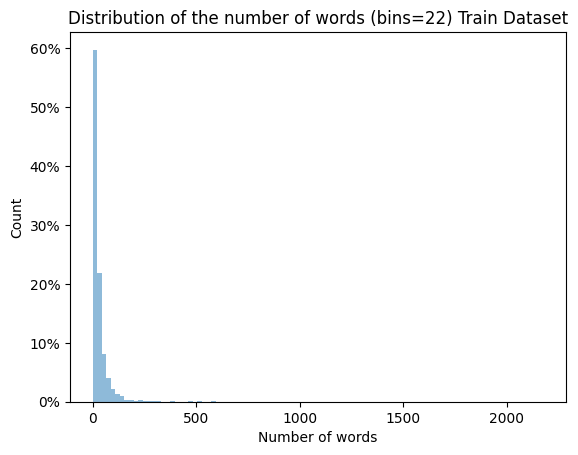

In [13]:
plot_distribution_nb_words(number_words_train, 22, 'Train Dataset')

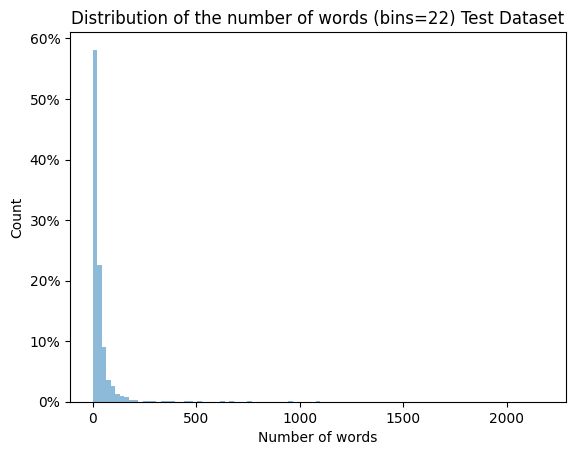

In [14]:
plot_distribution_nb_words(number_words_test, 22, 'Test Dataset')

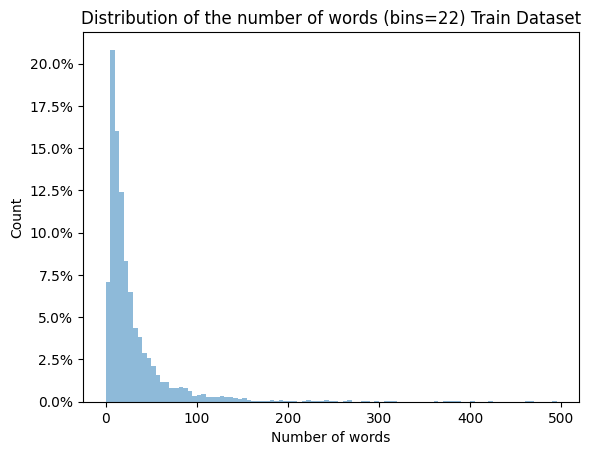

In [15]:
plot_distribution_nb_words(number_words_train, 5, 'Train Dataset')

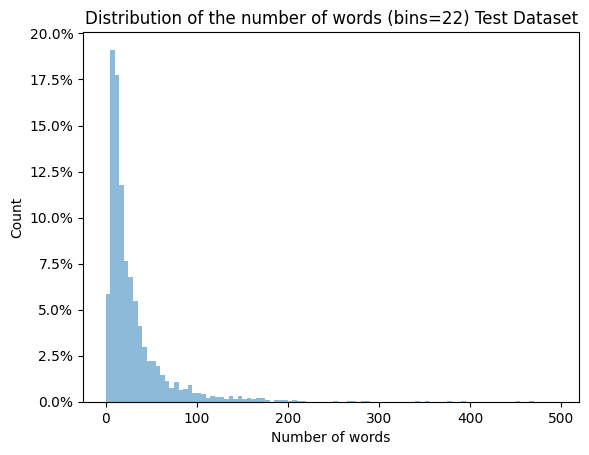

In [16]:
plot_distribution_nb_words(number_words_test, 5, 'Test Dataset')

## Nombre de mots dans un message insultant

In [28]:
df_train_I = df_train[df_train["Insult"]==1]
sentences_train_I = df_train_I["text_clean"].values.astype(str)
number_words_train_I = [len(words) for words in [sentence.split(" ") for sentence in sentences_train_I]]

print("Nombre max de mot dans un commentaire : ", max(number_words_train_I))
print("Nombre min de mot dans un commentaire : ", min(number_words_train_I))
print("Nombre moyen de mot dans un commentaire : ", mean(number_words_train_I))
print("Nombre median de mot dans un commentaire : ", median(number_words_train_I))

Nombre max de mot dans un commentaire :  682
Nombre min de mot dans un commentaire :  1
Nombre moyen de mot dans un commentaire :  24.95900857959962
Nombre moyen de mot dans un commentaire :  15


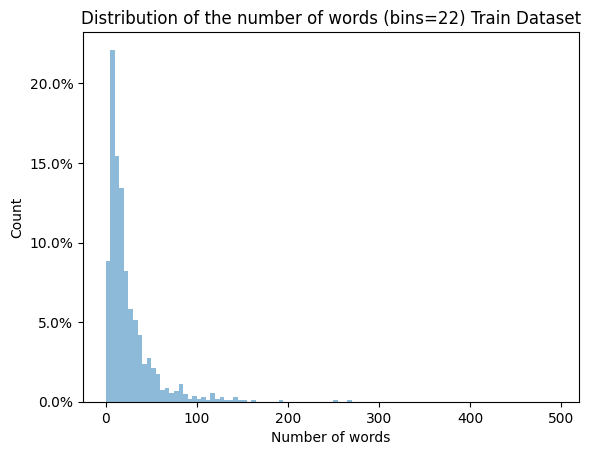

In [39]:
plot_distribution_nb_words(number_words_train_I, 5, 'Train Dataset')

In [29]:
df_test_I = df_test[df_test["Insult"]==1]
sentences_test_I = df_test_I["text_clean"].values.astype(str)
number_words_test_I = [len(words) for words in [sentence.split(" ") for sentence in sentences_test_I]]

print("Nombre max de mot dans un commentaire : ", max(number_words_test_I))
print("Nombre min de mot dans un commentaire : ", min(number_words_test_I))
print("Nombre moyen de mot dans un commentaire : ", mean(number_words_test_I))
print("Nombre median de mot dans un commentaire : ", median(number_words_test_I))

Nombre max de mot dans un commentaire :  193
Nombre min de mot dans un commentaire :  1
Nombre moyen de mot dans un commentaire :  24.95959595959596
Nombre median de mot dans un commentaire :  16


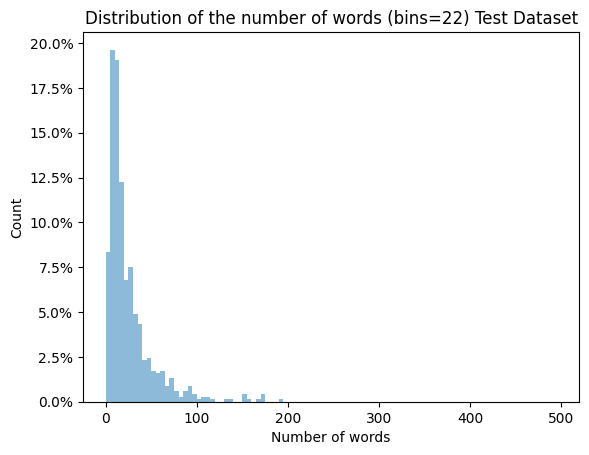

In [40]:
plot_distribution_nb_words(number_words_test_I, 5, 'Test Dataset')

# Analyse du nombre de messages insultants

<AxesSubplot:xlabel='Insult', ylabel='count'>

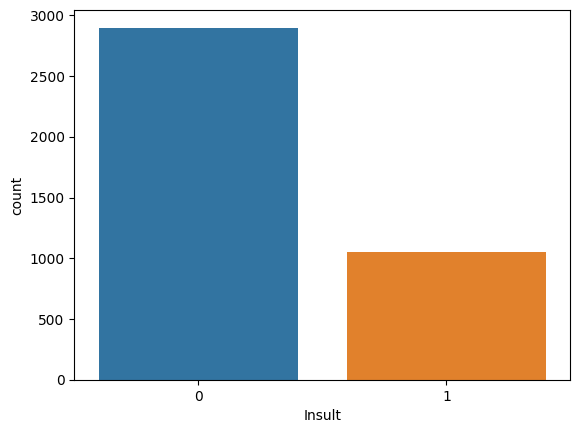

In [17]:
sns.countplot(data=df_train, x="Insult")

In [20]:
df_train["Insult"].value_counts(normalize=True)

0    0.734229
1    0.265771
Name: Insult, dtype: float64

<AxesSubplot:xlabel='Insult', ylabel='count'>

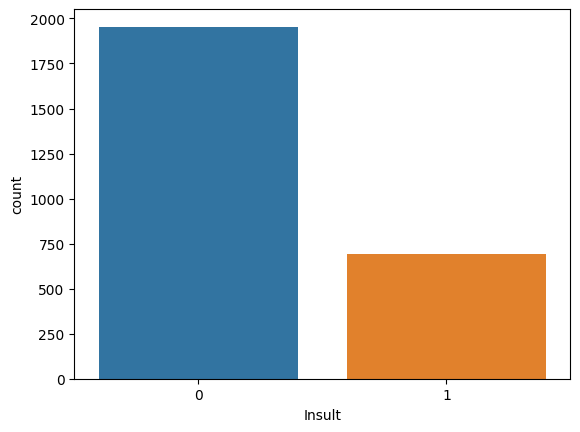

In [18]:
sns.countplot(data=df_test, x="Insult")

In [21]:
df_test["Insult"].value_counts(normalize=True)

0    0.738194
1    0.261806
Name: Insult, dtype: float64